<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> Numpy, Pandas and Visualization Mini Project </h1>
     


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb  
import warnings
warnings.filterwarnings('ignore')

<h5 class="list-group-item list-group-item-action active" >1. dataframe:</h5>



|Identifier|    |Date|  |Code_For_Name||Full_Name|
|----------|----|----|--|-----------|------|----------|
|1| |1979 [1978]|   |K. K.| |Mickéy Mousé|
|2| |1868|  |L., L. L.| |Donald Duck|
|218|   |1869|  |RemaÊ¿.||Mini Mouse|
|472|   |1851|  |A'BECKETT, Gilbert Abbott.||Donald Duck|
|5| |1857|  |ABATI, Francesco.||Pink Panther|


In [4]:
df=pd.DataFrame({'Identifier':[1,2,218,472,5],'Date':['1979 [1978]',1868,1869,1851,1857],
                 'Code_For_Name':['K. K.','L., L. L.','RemaÊ¿.',"A'BECKETT, Gilbert Abbott.",'ABATI, Francesco.'],
                 'Full_Name':['Mickéy Mousé','Donald Duck','Mini Mouse','Donald Duck','Pink Panther']})

df

,Identifier,Date,Code_For_Name,Full_Name
0,1,1979 [1978],K. K.,Mickéy Mousé
1,2,1868,"L., L. L.",Donald Duck
2,218,1869,RemaÊ¿.,Mini Mouse
3,472,1851,"A'BECKETT, Gilbert Abbott.",Donald Duck
4,5,1857,"ABATI, Francesco.",Pink Panther


#### Cleaning the `date` column as shown in below format without using replace function.

In [5]:
df.Date[df.Date=='1979 [1978]']=1979
df

,Identifier,Date,Code_For_Name,Full_Name
0,1,1979,K. K.,Mickéy Mousé
1,2,1868,"L., L. L.",Donald Duck
2,218,1869,RemaÊ¿.,Mini Mouse
3,472,1851,"A'BECKETT, Gilbert Abbott.",Donald Duck
4,5,1857,"ABATI, Francesco.",Pink Panther


####  Cleaning the `Code_For_Name` column as shown in below format without using replace function.

In [6]:
df.Code_For_Name.where(df.Code_For_Name!=df.Code_For_Name,other=['KK','LLL','Rema','GilbertAbbottAbeckett','FrancescoAbati'],inplace=True)
df

,Identifier,Date,Code_For_Name,Full_Name
0,1,1979,KK,Mickéy Mousé
1,2,1868,LLL,Donald Duck
2,218,1869,Rema,Mini Mouse
3,472,1851,GilbertAbbottAbeckett,Donald Duck
4,5,1857,FrancescoAbati,Pink Panther


#### 1.C) Cleaning the `Full_Name` column as shown in below format.


In [7]:
df.replace('é','',regex=True,inplace=True)

df['First_Name']=[df.Full_Name[i].split()[0] for i in range(len(df))]
df['Last_Name']=[df.Full_Name[i].split()[1] for i in range(len(df))]
df.drop(columns='Full_Name',inplace=True)

df

,Identifier,Date,Code_For_Name,First_Name,Last_Name
0,1,1979,KK,Micky,Mous
1,2,1868,LLL,Donald,Duck
2,218,1869,Rema,Mini,Mouse
3,472,1851,GilbertAbbottAbeckett,Donald,Duck
4,5,1857,FrancescoAbati,Pink,Panther


<h5 class="list-group-item list-group-item-action active" >2. Reading the dataset called Menu_list_Carbohydrates.csv dataset </h5>


In [8]:
ds=pd.read_csv('Menu_list_Carbohydrates.csv')
ds.head()

,Category_Type,Item_in_Menu,Carbohydrates,Sugars,Protein,Calories
0,Breakfast,Egg McMuffin,31,3,17,300
1,Breakfast,Egg White Delight,30,3,18,250
2,Breakfast,Sausage McMuffin,29,2,14,370
3,Beef & Pork,Big Mac,47,2,21,450
4,Beef & Pork,Quarter Pounder with Cheese,41,2,21,400


####  dimensions,datatype, statistic summary.

In [9]:
print('DataSet Dimension:',ds.ndim)
print()
print('Data type:\n',ds.dtypes)
print()
print('Satistic summary:\n',ds.describe())

DataSet Dimension: 2

Data type:
 Category_Type    object
Item_in_Menu     object
Carbohydrates     int64
Sugars            int64
Protein           int64
Calories          int64
dtype: object

Satistic summary:
        Carbohydrates    Sugars    Protein     Calories
count      53.000000  53.00000  53.000000    53.000000
mean       43.169811   8.45283  21.716981   523.207547
std        29.685360   7.18590   9.841782   209.530369
min         0.000000   0.00000   1.000000   150.000000
25%        25.000000   3.00000  17.000000   410.000000
50%        39.000000   7.00000  20.000000   480.000000
75%        58.000000  14.00000  28.000000   600.000000
max       135.000000  32.00000  48.000000  1150.000000


#### the top 10 items that have the least Carbohydrates

In [10]:
ds.sort_values('Carbohydrates').head(10)

,Category_Type,Item_in_Menu,Carbohydrates,Sugars,Protein,Calories
38,Coffee & Tea,Iced Tea (Large),0,0,1,150
37,Coffee & Tea,Iced Tea (Medium),0,2,12,300
36,Coffee & Tea,Iced Tea (Small),0,14,15,520
26,Snacks & Sides,Apple Slices,4,7,33,670
25,Snacks & Sides,Side Salad,4,8,30,570
31,Desserts,Kids Ice Cream Cone,7,17,36,1090
11,Salads,Premium Bacon Ranch Salad with Grilled Chicken,8,3,11,480
9,Salads,Premium Bacon Ranch Salad (without Chicken),10,4,20,470
24,Snacks & Sides,Kids French Fries,15,7,30,620
12,Salads,Premium Southwest Salad (without Chicken),20,2,18,510


####  the top 10 items that have the most Carbohydrates

In [11]:
ds.sort_values('Carbohydrates').tail(10)

,Category_Type,Item_in_Menu,Carbohydrates,Sugars,Protein,Calories
23,Snacks & Sides,Large French Fries,67,15,21,500
44,Smoothies & Shakes,Strawberry Banana Smoothie (Large),74,12,37,600
35,Beverages,Coca-Cola Classic (Large),76,14,8,350
47,Smoothies & Shakes,Mango Pineapple Smoothie (Large),78,10,48,750
41,Smoothies & Shakes,Blueberry Pomegranate Smoothie (Large),79,18,5,260
48,Smoothies & Shakes,Vanilla Shake (Small),86,6,12,240
51,Smoothies & Shakes,Strawberry Shake (Small),90,14,39,720
49,Smoothies & Shakes,Vanilla Shake (Medium),109,7,15,290
52,Smoothies & Shakes,Strawberry Shake (Medium),114,7,22,380
50,Smoothies & Shakes,Vanilla Shake (Large),135,7,24,430


####  the bar graph for frequncy of `Categories` of food items 

<AxesSubplot:ylabel='Frequency'>

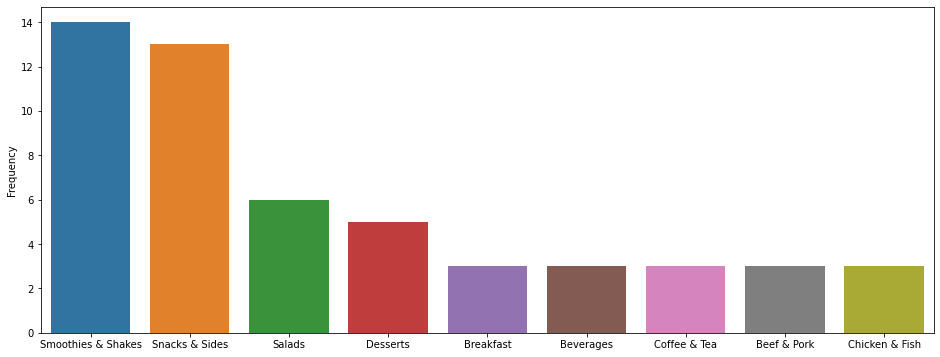

In [12]:
var=pd.DataFrame(pd.value_counts(ds.Category_Type))
var.rename(columns={'Category_Type':'Frequency'},inplace=True)

plt.figure(figsize=(16,6))
sb.barplot(var.index,var.Frequency)

#### Observation: BarPlot cannot be plotted directly with the catogorical variables(either one of the axis must be numerical). we need to draw the count of frequency of the catagorical variable and we can plot type of catagory against frequency. 

#### Instead we can also use Count plot as below.This can also be obtained directly using Histogram. 

<AxesSubplot:xlabel='Category_Type', ylabel='count'>

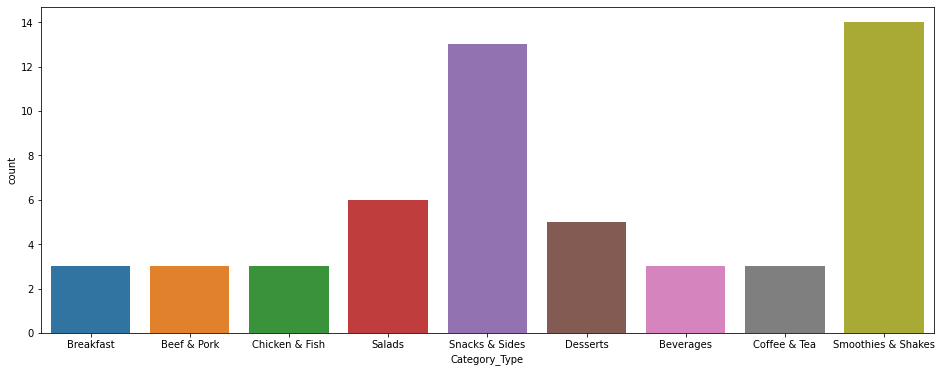

In [13]:
plt.figure(figsize=(16,6))
sb.countplot(ds.Category_Type)

<AxesSubplot:xlabel='Category_Type', ylabel='Count'>

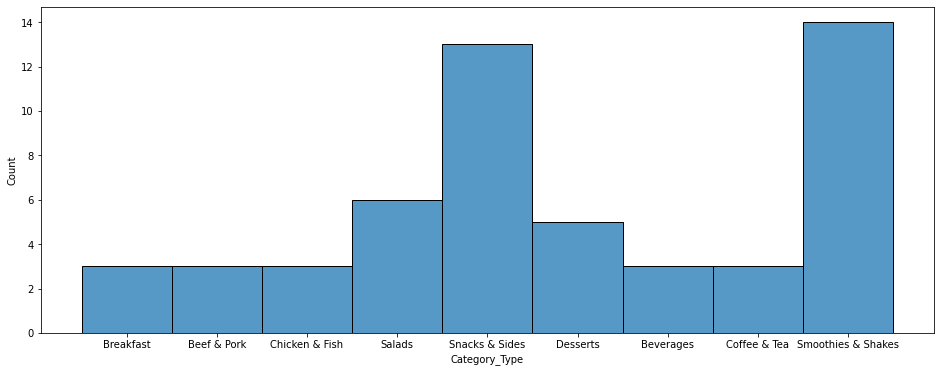

In [14]:
plt.figure(figsize=(16,6))
sb.histplot(ds.Category_Type)

### An Indian male requires 2500 calories in a day and a female requires 2000 calories in a day to maintain good lifestyle. Finding Average calories intake from beverages by Male and female

In [15]:
ds.head()

,Category_Type,Item_in_Menu,Carbohydrates,Sugars,Protein,Calories
0,Breakfast,Egg McMuffin,31,3,17,300
1,Breakfast,Egg White Delight,30,3,18,250
2,Breakfast,Sausage McMuffin,29,2,14,370
3,Beef & Pork,Big Mac,47,2,21,450
4,Beef & Pork,Quarter Pounder with Cheese,41,2,21,400


In [16]:
avg=round(ds.groupby('Category_Type')['Calories'].mean()['Beverages'],2)

print("Average calories of 'Beverages' category is ",avg)
print("On an Average 'Beverages' contributes to men's calories intake ",round(avg/2500,2))
print("On an Average 'Beverages' contributes to women's calories intake",round(avg/2000,2))

Average calories of 'Beverages' category is  796.67
On an Average 'Beverages' contributes to men's calories intake  0.32
On an Average 'Beverages' contributes to women's calories intake 0.4


### Finding Average calories intake from Coffee and Tea by Male and female

In [17]:
avg=round(ds.groupby('Category_Type')['Calories'].mean()['Coffee & Tea'],2)
print("Average calories of 'Coffee & Tea' category is ",avg)
print("Average 'Coffee & Tea' contributes to men's calories intake ",round(avg/2500,2))
print("Average 'Coffee & Tea' contributes to women's calories intake",round(avg/2000,2))

Average calories of 'Coffee & Tea' category is  323.33
Average 'Coffee & Tea' contributes to men's calories intake  0.13
Average 'Coffee & Tea' contributes to women's calories intake 0.16


### Analysis the  calorie intake If one ordered grilled chicken rather than crispy chicken


##### Plot representing the number of calories in Crispy Chicken category

In [18]:
dsc=ds[ds.Item_in_Menu.str.find('Crispy Chicken')!=-1]
dsc['Category']='Crispy Chicken'
dsc

,Category_Type,Item_in_Menu,Carbohydrates,Sugars,Protein,Calories,Category
6,Chicken & Fish,Premium Crispy Chicken Classic Sandwich,55,3,19,460,Crispy Chicken
8,Chicken & Fish,Premium Crispy Chicken Club Sandwich,58,3,20,410,Crispy Chicken
10,Salads,Premium Bacon Ranch Salad with Crispy Chicken,22,2,11,430,Crispy Chicken
13,Salads,Premium Southwest Salad with Crispy Chicken,42,3,18,570,Crispy Chicken
15,Snacks & Sides,Chipotle BBQ Snack Wrap (Crispy Chicken),37,3,18,520,Crispy Chicken
17,Snacks & Sides,Honey Mustard Snack Wrap (Crispy Chicken),34,4,17,470,Crispy Chicken
19,Snacks & Sides,Ranch Snack Wrap (Crispy Chicken),32,15,19,460,Crispy Chicken


<AxesSubplot:xlabel='Calories', ylabel='Item_in_Menu'>

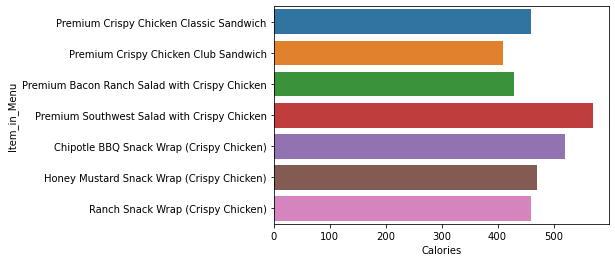

In [19]:
sb.barplot(dsc.Calories,dsc.Item_in_Menu)

##### Find the average calories for Crispy Chicken Category

In [20]:
print("average calories for Crispy Chicken Category: ",round(dsc.Calories.mean(),2))

average calories for Crispy Chicken Category:  474.29


#####  plot for the number of calories in Grilled Chicken category

In [21]:
dsg=ds[ds.Item_in_Menu.str.find('Grilled Chicken')!=-1]
dsg['Category']='Grilled Chicken'
dsg

,Category_Type,Item_in_Menu,Carbohydrates,Sugars,Protein,Calories,Category
7,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,42,4,19,520,Grilled Chicken
11,Salads,Premium Bacon Ranch Salad with Grilled Chicken,8,3,11,480,Grilled Chicken
14,Salads,Premium Southwest Salad with Grilled Chicken,28,3,18,460,Grilled Chicken
16,Snacks & Sides,Chipotle BBQ Snack Wrap (Grilled Chicken),30,3,17,410,Grilled Chicken
18,Snacks & Sides,Honey Mustard Snack Wrap (Grilled Chicken),27,3,25,540,Grilled Chicken
20,Snacks & Sides,Ranch Snack Wrap (Grilled Chicken),25,16,20,400,Grilled Chicken


<AxesSubplot:xlabel='Calories', ylabel='Item_in_Menu'>

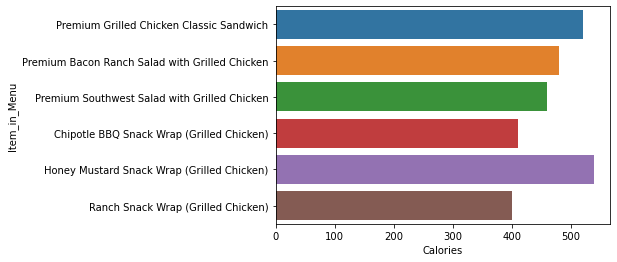

In [22]:
sb.barplot(dsg.Calories,dsg.Item_in_Menu)

##### Finding the average calories for Grilled Chicken Category

In [23]:
print("average calories for Grilled Chicken Category: ",round(dsg.Calories.mean(),2))

average calories for Grilled Chicken Category:  468.33


##### Geting the final visual comparison of Crispy vs Grilled on the basis of calories

In [24]:
dscg=pd.concat([dsc,dsg])
dscg

,Category_Type,Item_in_Menu,Carbohydrates,Sugars,Protein,Calories,Category
6,Chicken & Fish,Premium Crispy Chicken Classic Sandwich,55,3,19,460,Crispy Chicken
8,Chicken & Fish,Premium Crispy Chicken Club Sandwich,58,3,20,410,Crispy Chicken
10,Salads,Premium Bacon Ranch Salad with Crispy Chicken,22,2,11,430,Crispy Chicken
13,Salads,Premium Southwest Salad with Crispy Chicken,42,3,18,570,Crispy Chicken
15,Snacks & Sides,Chipotle BBQ Snack Wrap (Crispy Chicken),37,3,18,520,Crispy Chicken
17,Snacks & Sides,Honey Mustard Snack Wrap (Crispy Chicken),34,4,17,470,Crispy Chicken
19,Snacks & Sides,Ranch Snack Wrap (Crispy Chicken),32,15,19,460,Crispy Chicken
7,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,42,4,19,520,Grilled Chicken
11,Salads,Premium Bacon Ranch Salad with Grilled Chicken,8,3,11,480,Grilled Chicken
14,Salads,Premium Southwest Salad with Grilled Chicken,28,3,18,460,Grilled Chicken


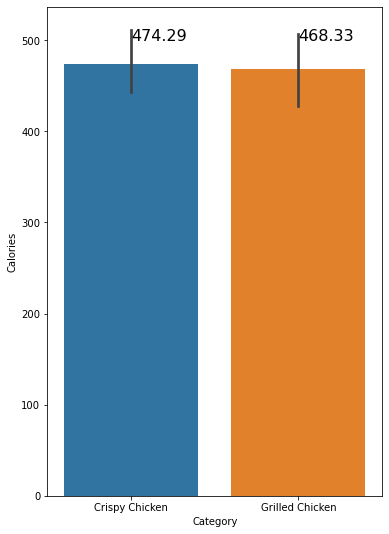

In [25]:
plt.figure(figsize=(6,9))
sb.barplot(dscg.Category,dscg.Calories)
crispy=round(dscg[dscg.Category=='Crispy Chicken']['Calories'].mean(),2)
grilled=round(dscg[dscg.Category=='Grilled Chicken']['Calories'].mean(),2)
plt.text(x=0,y=500,s=crispy,fontsize=16)
plt.text(x=1,y=500,s=grilled,fontsize=16)
plt.show()

### observations

#### Observation: In the given data, The avearage calories intake for the items under Crispy Chicken categories is slightly above when compared with the average intake for the items under grilled chicken. 

#### Consuming grilled chicken items are more healthier when compared to crisy chicken items in the list. 

### Plot scatter plot between carbohydrates and calories

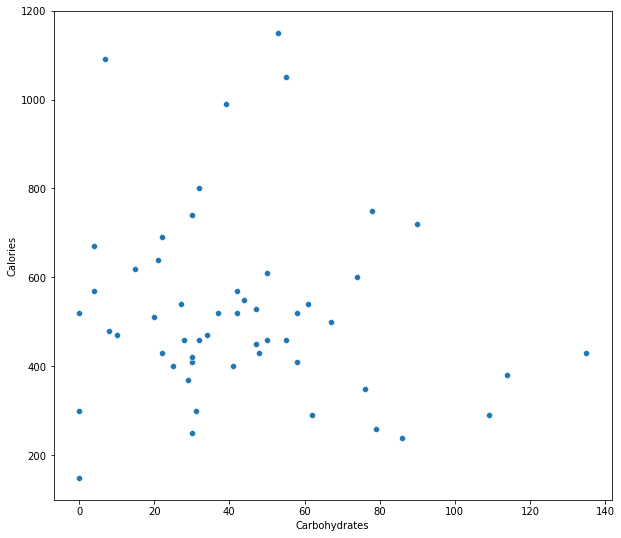

In [26]:
plt.figure(figsize=(10,9))
sb.scatterplot(ds.Carbohydrates,ds.Calories)
plt.show()